# **Telecommunications Customer Churn Prediction Project**

**Aim**: The project aims to predict customer churn in a telecommunications company based on various customer attributes and service usage patterns, utilizing data analysis and machine learning techniques.

**Tools Used**: Python for data analysis, EDA, feature engineering, and machine learning.

**Project Motto**: Our project is crucial for identifying customers at risk of leaving the telecommunications service, enabling proactive retention strategies and improving customer satisfaction and loyalty.

**Initial Hypotheses**:

1. **Demographic Factors**: Senior citizens might have different churn behavior compared to younger customers. Similarly, customers with partners and dependents might exhibit different churn patterns.

2. **Service Usage**: Customers who have been with the company for longer periods might be less likely to churn. Services like OnlineSecurity, TechSupport, and DeviceProtection might influence churn behavior positively.

3. **Contract and Billing**: Customers with longer contract durations or those enrolled in paperless billing might have lower churn rates.

4. **Payment Method**: Payment method could influence churn behavior, with certain methods being associated with higher or lower churn rates.

**Columns in Data**:

- CustomerID: Unique identifier for each customer
- Gender: Male or Female
- SeniorCitizen: Whether the customer is a senior citizen or not (1 for yes, 0 for no)
- Partner: Whether the customer has a partner or not (Yes/No)
- Dependents: Whether the customer has dependents or not (Yes/No)
- Tenure: Number of months the customer has been with the company
- PhoneService: Whether the customer has phone service or not (Yes/No)
- MultipleLines: Whether the customer has multiple lines or not (Yes/No)
- InternetService: Type of internet service subscribed (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes/No/No internet service)
- ... (Other services like TechSupport, StreamingTV, StreamingMovies, etc.)
- Contract: Type of contract (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has opted for paperless billing (Yes/No)
- PaymentMethod: Payment method used by the customer (Electronic check, Mailed check, Bank transfer, Credit card)
- MonthlyCharges: Monthly charges for the customer
- TotalCharges: Total charges incurred by the customer
- Churn: Whether the customer churned or not (Yes/No)




# Importing the necessary libraries required

In [85]:
#importing all the neccesary libraries required for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Warning is used to supress the display of warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries used for Encoding:
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# importing libraries required for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# libraries  required for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# loading data set

In [86]:
data= pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.shape


(7043, 21)

In [87]:
#copying into a new variable
data=data.copy()
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Exploratory Data Analysis

In [88]:
#provides a summary of DataFrame structure (columns, data types, missing values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [89]:
# Gives the  summary statistics including object types (descriptive stats for numerics, counts and unique values for categoricals)
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [90]:
# using Loop through each column in the dataset to find the unique values
for column in data.columns:
    # Get the unique values of the current column
    unique_values = data[column].unique()
    # Print the column name and its unique values
    print(f"Unique values in {column}: {unique_values}")


Unique values in customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in gender: ['Female' 'Male']
Unique values in SeniorCitizen: [0 1]
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' '

In [91]:
# Calculate the percentage of null values in each column
for column in data.columns:
    null_count = data[column].isnull().sum()
    total_count = data[column].shape[0]
    null_percentage = (null_count / total_count) * 100

    # Print the column name and its null percentage
    print(f"Null percentage in {column}: {null_percentage:.2f}%")


Null percentage in customerID: 0.00%
Null percentage in gender: 0.00%
Null percentage in SeniorCitizen: 0.00%
Null percentage in Partner: 0.00%
Null percentage in Dependents: 0.00%
Null percentage in tenure: 0.00%
Null percentage in PhoneService: 0.00%
Null percentage in MultipleLines: 0.00%
Null percentage in InternetService: 0.00%
Null percentage in OnlineSecurity: 0.00%
Null percentage in OnlineBackup: 0.00%
Null percentage in DeviceProtection: 0.00%
Null percentage in TechSupport: 0.00%
Null percentage in StreamingTV: 0.00%
Null percentage in StreamingMovies: 0.00%
Null percentage in Contract: 0.00%
Null percentage in PaperlessBilling: 0.00%
Null percentage in PaymentMethod: 0.00%
Null percentage in MonthlyCharges: 0.00%
Null percentage in TotalCharges: 0.00%
Null percentage in Churn: 0.00%


**since there are no null values our data set is perfectly alright**

**Dropping of unwanted columns**

*   We identified 'customerID' as a unique identifier for customers, which is typically not relevant for predicting churn. Hence, it's removed.

* Similarly, 'gender' is removed because gender distribution is relatively balanced with similar churn rates between Male and Female categories, suggesting it may not provide significant predictive power for churn.




In [92]:
# Identify unnecessary columns based on domain knowledge or redundancy
unnecessary_columns = ['customerID', 'gender']  # Removing 'customerID' and 'gender' columns

# Removing unnecessary columns
data = data.drop(columns=unnecessary_columns)

# Display the filtered dataset
print("\n Data:")
print(data.head())



 Data:
   SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines  \
0              0     Yes         No       1           No  No phone service   
1              0      No         No      34          Yes                No   
2              0      No         No       2          Yes                No   
3              0      No         No      45           No  No phone service   
4              0      No         No       2          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract Paperles

In [93]:
# Iterate over each column in the DataFrame to know  the value counts in it
for column in data.columns:
    # Calculate the value counts for the current column
    value_counts = data[column].value_counts()

    # Print the column name
    print(f"Column: {column}")

    # Print the value counts for the current column
    print(value_counts)
    print()  # Add an empty line for readability


Column: SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Column: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Column: tenure
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Column: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Column: OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
N

 # Visualize the demographics of the columns using visual representations.
 **This visualization provides a summary of various customer data points, potentially helpful for understanding customer demographics, service usage patterns, billing preferences, and churn rates**

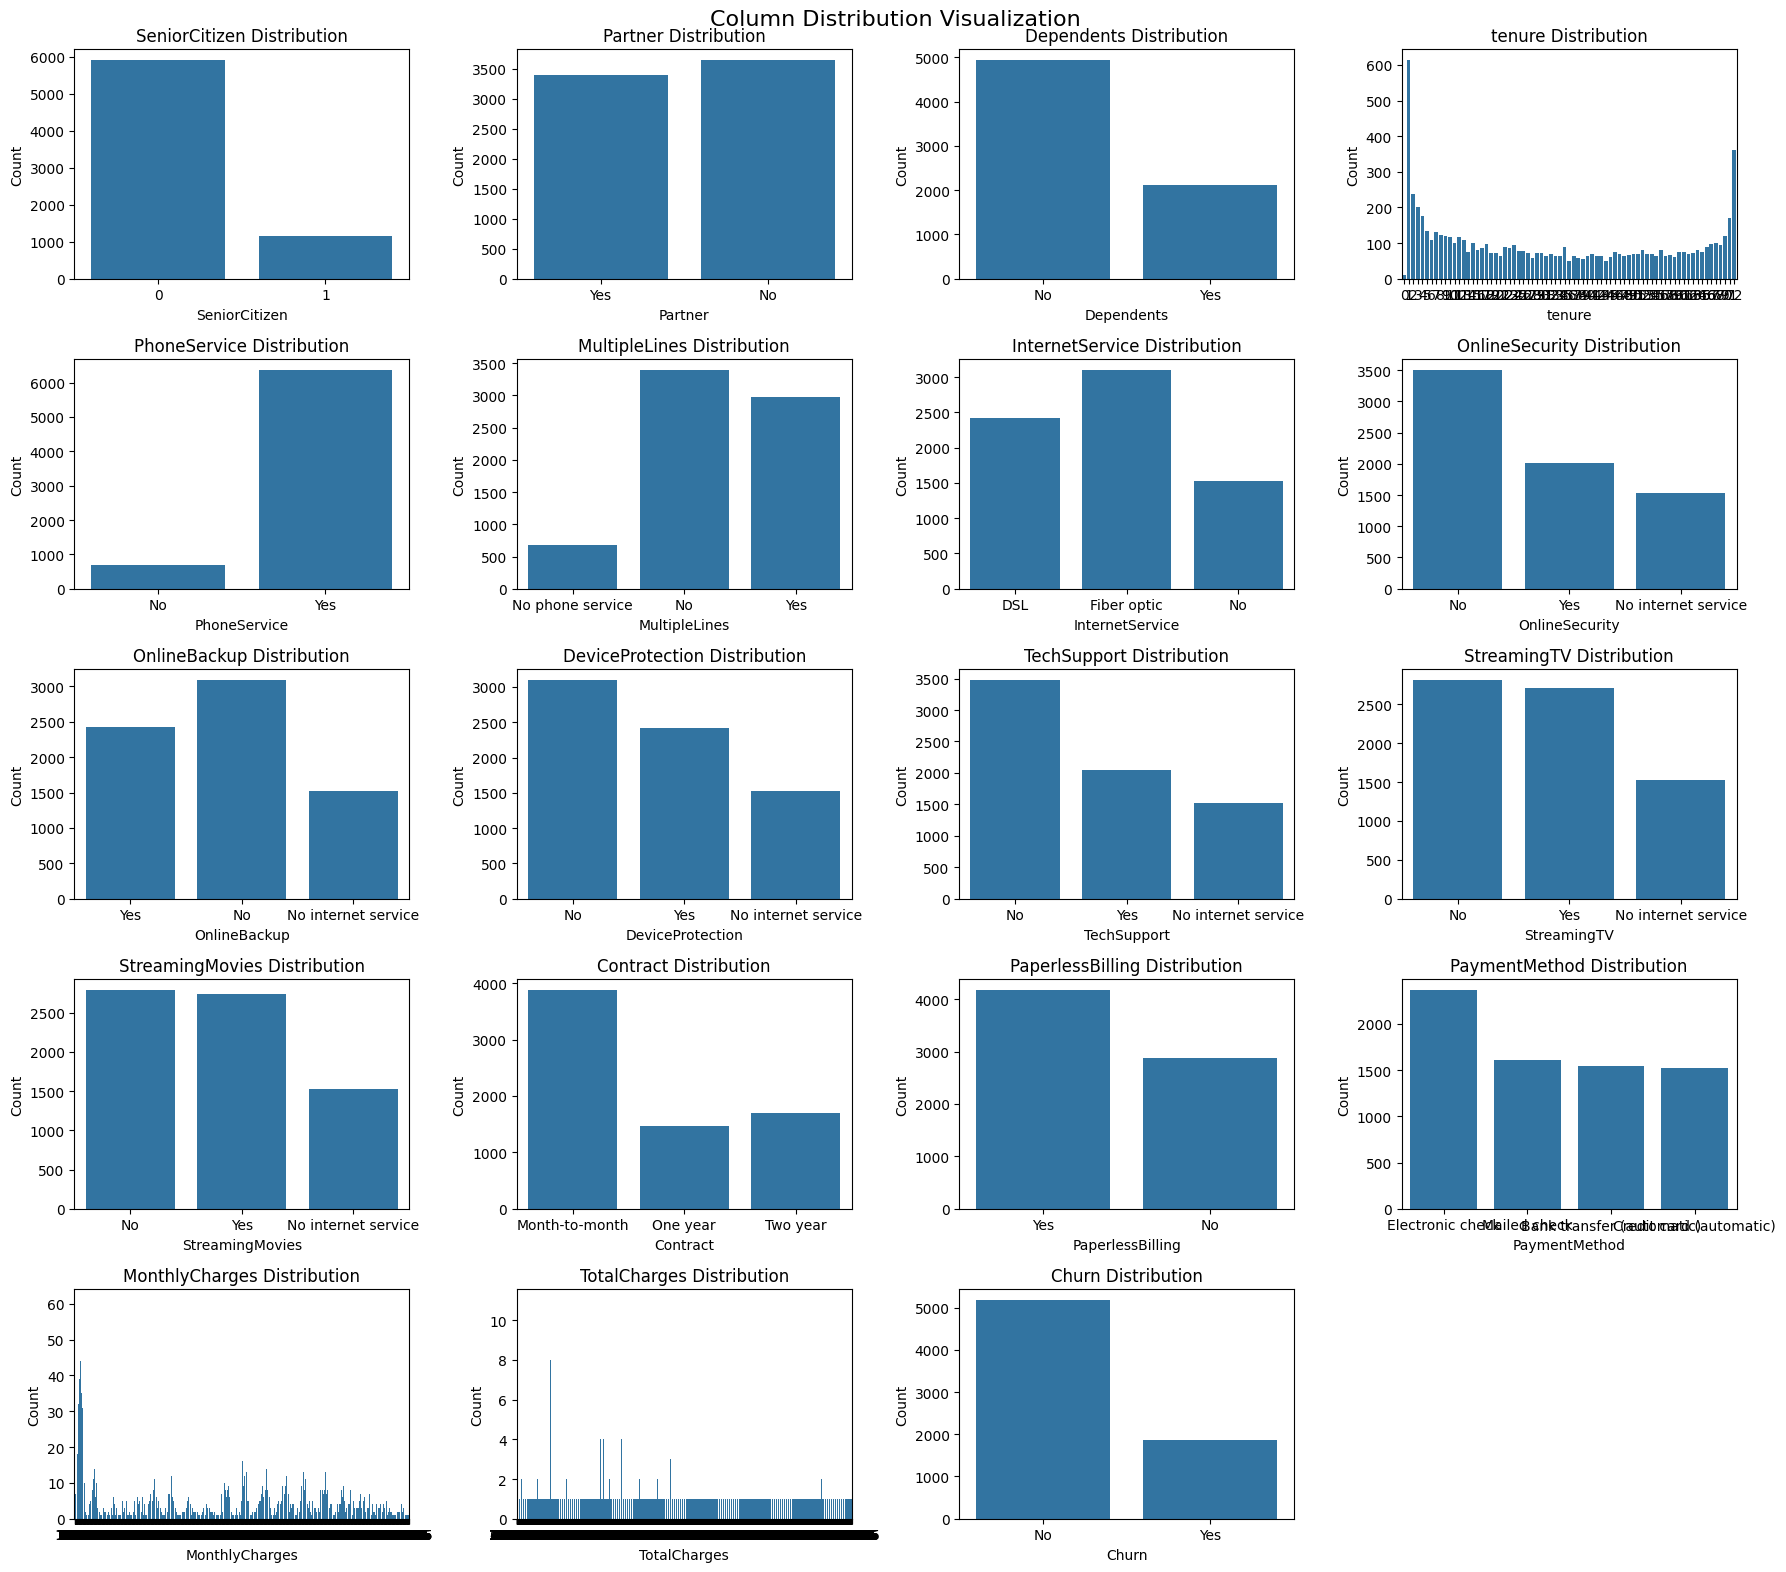

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize
columns_to_visualize = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                        'MonthlyCharges', 'TotalCharges', 'Churn']

plt.figure(figsize=(18, 16))
plt.suptitle('Column Distribution Visualization', fontsize=16)

rows = 5
cols = 4

for i in range(len(columns_to_visualize)):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=columns_to_visualize[i], data=data)
    plt.title(f'{columns_to_visualize[i]} Distribution')
    plt.xlabel(columns_to_visualize[i])
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


Customer churn ratio

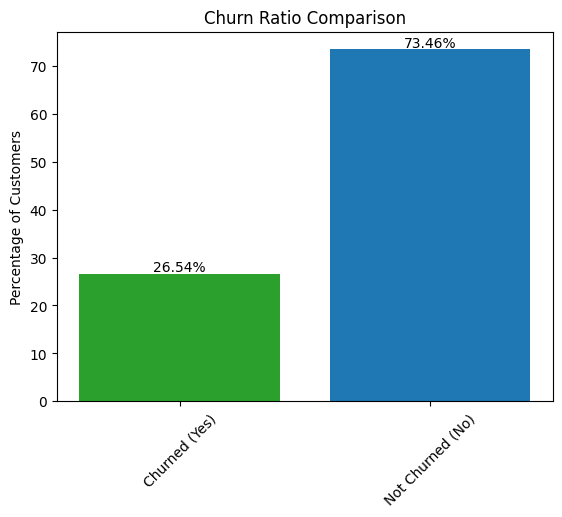

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the number of customers who churned (Churn == 'Yes')
churned_count = data[data.Churn == 'Yes'].shape[0]

# Calculate the number of customers who did not churn (Churn == 'No')
not_churned_count = data[data.Churn == 'No'].shape[0]

# Calculate the churn ratio for 'Yes' and 'No'
churn_ratio_yes = (churned_count / data.shape[0]) * 100
churn_ratio_no = (not_churned_count / data.shape[0]) * 100

# Plotting
labels = ['Churned (Yes)', 'Not Churned (No)']
churn_ratios = [churn_ratio_yes, churn_ratio_no]

# Set up color gradient
colors = ['#2ca02c', '#1f77b4']

plt.bar(labels, churn_ratios, color=colors)

# Adding percentage labels on the bars
for i in range(len(labels)):
    plt.text(i, churn_ratios[i] + 0.5, f"{churn_ratios[i]:.2f}%", ha='center')

plt.ylabel('Percentage of Customers')
plt.title('Churn Ratio Comparison')
plt.xticks(rotation=45)
plt.show()




Every Feature V/S churn visual

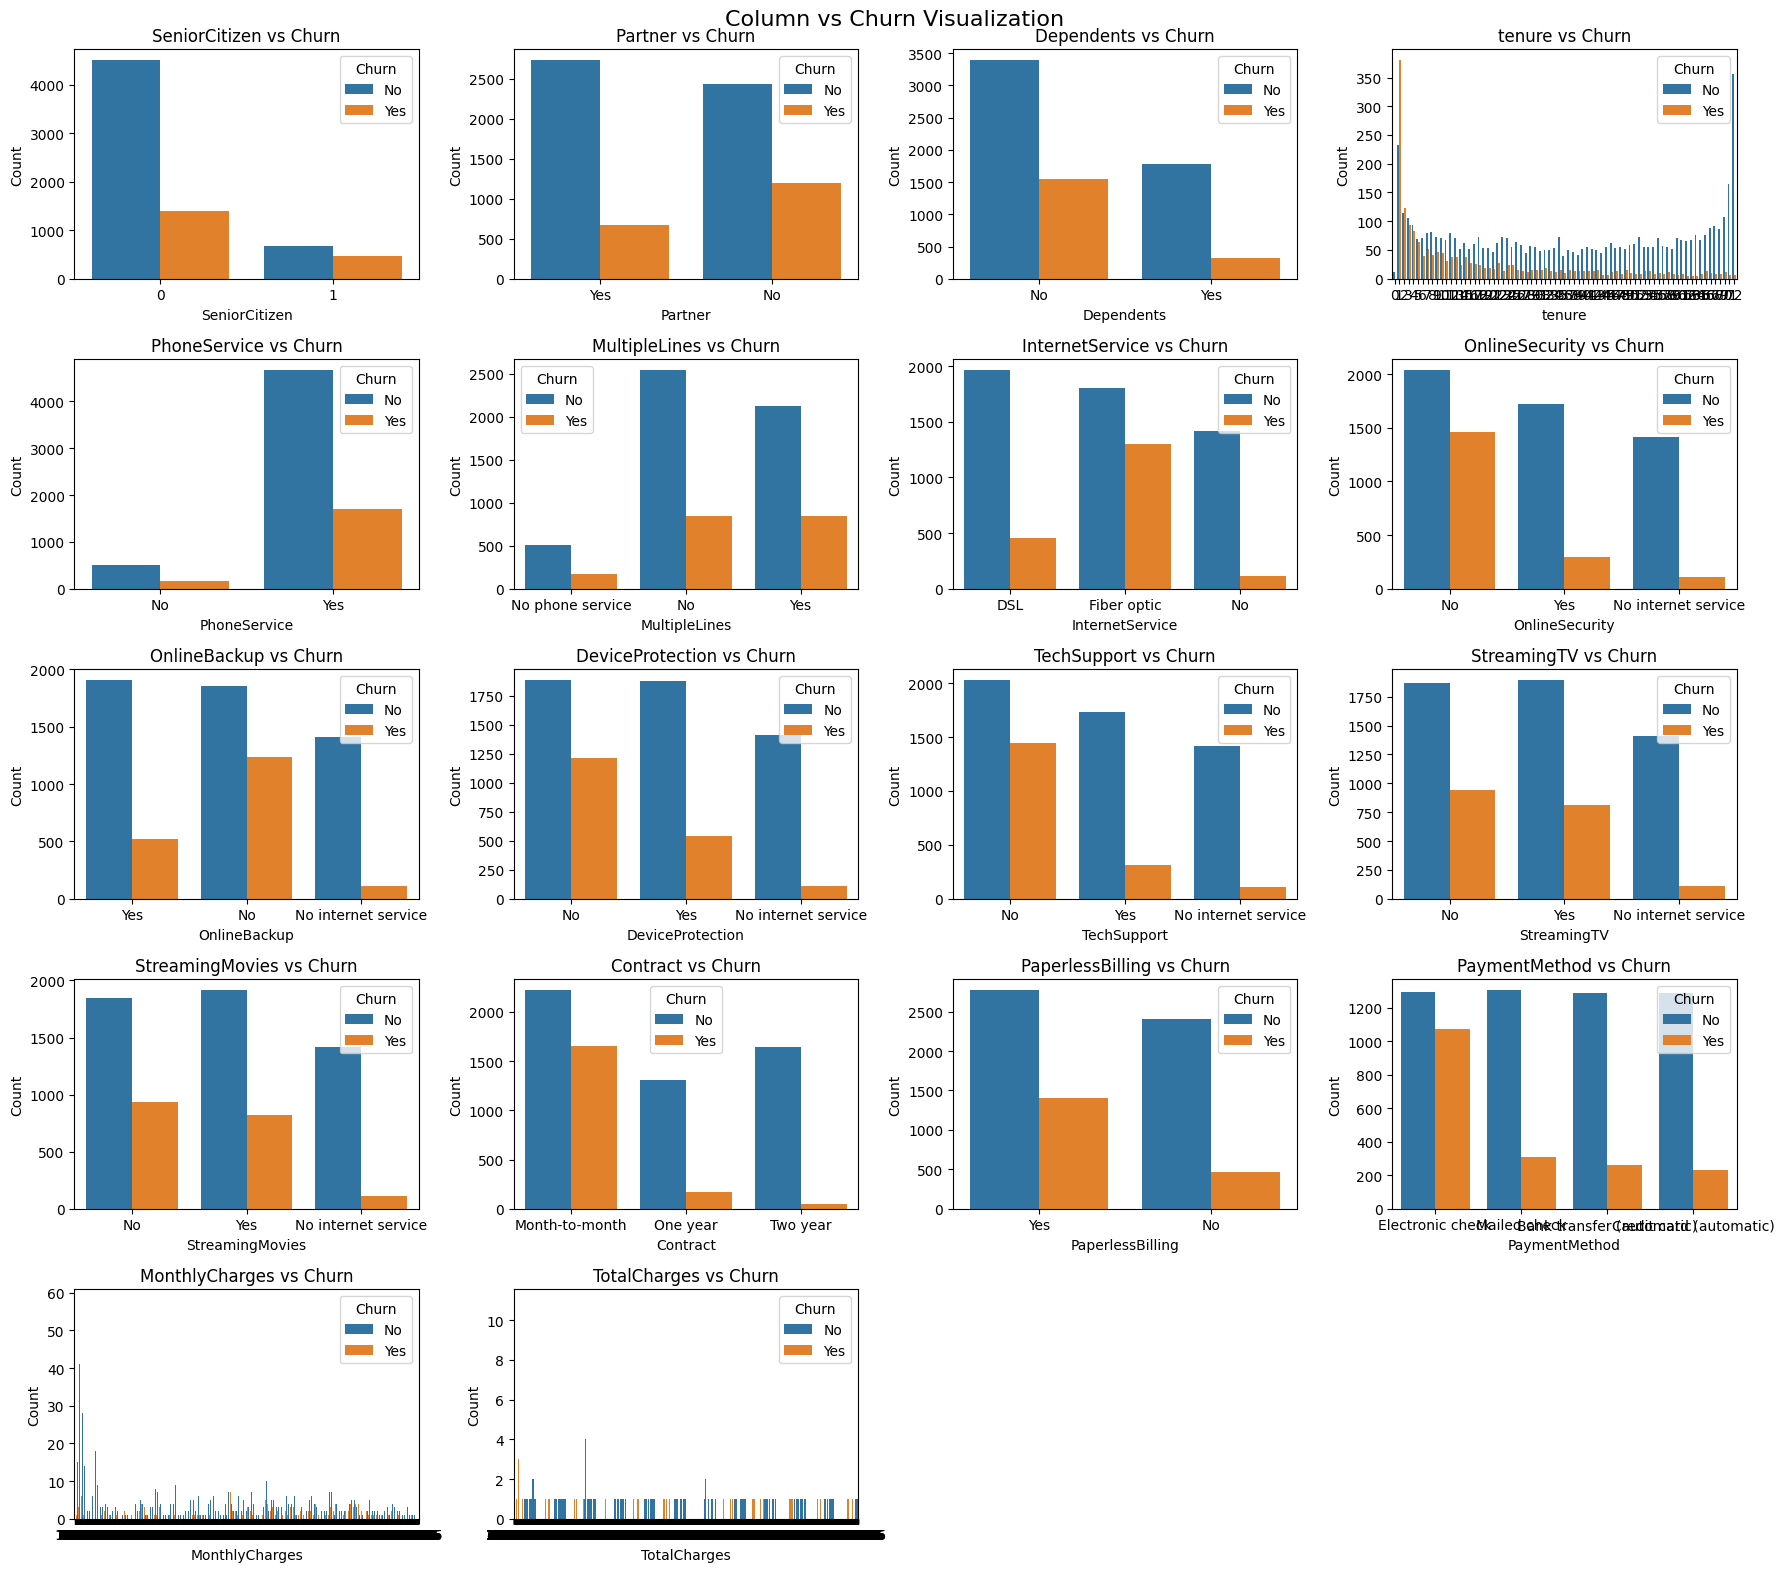

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize
columns_to_visualize = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                        'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(18, 16))
plt.suptitle('Column vs Churn Visualization', fontsize=16)

rows = 5
cols = 4

for i, column in enumerate(columns_to_visualize):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=column, hue='Churn', data=data)
    plt.title(f'{column} vs Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Churn')

plt.tight_layout()
plt.show()


**By analyzing these relationships, the company can identify areas where they might be losing customers and develop targeted strategies to reduce churn. For instance, they might focus on improving customer service for specific demographics or offering more attractive plans for customers who frequently churn**

# Seperating Target and Feature variables

In [97]:
# Identify dependent variable (target)
dependent_variable = 'Churn'

# Identify independent variables (features)
independent_variables = [col for col in data.columns if col != dependent_variable]

# Display dependent variable
print("Dependent Variable (Target):", dependent_variable)

# Display independent variables (features)
print("Independent Variables (Features):", independent_variables)


Dependent Variable (Target): Churn
Independent Variables (Features): ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


#Encoding of columns

In [98]:
import pandas as pd

# Columns to encode
columns_to_encode = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService']

# Convert boolean columns to strings if needed
bool_columns = ['Partner', 'Dependents', 'PhoneService']
for col in bool_columns:
    data[col] = data[col].astype(str)

# Apply one-hot encoding to categorical columns
encoded_data = pd.get_dummies(data, columns=columns_to_encode, drop_first=True)

# Display the encoded dataset
print(data.head())


   SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines  \
0              0     Yes         No       1           No  No phone service   
1              0      No         No      34          Yes                No   
2              0      No         No       2          Yes                No   
3              0      No         No      45           No  No phone service   
4              0      No         No       2          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling

In [99]:
# Define a mapping dictionary for 'Yes' and 'No' values to integers
mapping = {'Yes': 1, 'No': 0}

# Columns to encode
bool_columns = ['Partner', 'Dependents', 'PhoneService']

# Convert boolean columns to integer type
for col in bool_columns:
    data[col] = data[col].map(mapping).astype(int)

# Display the dataset after encoding
print(data.head())



   SeniorCitizen  Partner  Dependents  tenure  PhoneService     MultipleLines  \
0              0        1           0       1             0  No phone service   
1              0        0           0      34             1                No   
2              0        0           0       2             1                No   
3              0        0           0      45             0  No phone service   
4              0        0           0       2             1                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contrac

In [100]:
# Map 'Yes' to True and 'No' to False in the 'Churn' column
data['Churn'] = data['Churn'].map({'Yes': True, 'No': False})

# Convert boolean values to integers (True -> 1, False -> 0)
data['Churn'] = data['Churn'].astype(int)

# Display the dataset after encoding
print(data.head())



   SeniorCitizen  Partner  Dependents  tenure  PhoneService     MultipleLines  \
0              0        1           0       1             0  No phone service   
1              0        0           0      34             1                No   
2              0        0           0       2             1                No   
3              0        0           0      45             0  No phone service   
4              0        0           0       2             1                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contrac

In [101]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                     'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                     'PaperlessBilling', 'PaymentMethod']

# Encode categorical columns using label encoding
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

# Display the dataset after encoding
print(data.head())


   SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
0              0        1           0       1             0              1   
1              0        0           0      34             1              0   
2              0        0           0       2             1              0   
3              0        0           0      45             0              1   
4              0        0           0       2             1              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                0               0             2                 0   
1                0               2             0                 2   
2                0               2             2                 0   
3                0               2             0                 2   
4                1               0             0                 0   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0       

In [102]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [103]:
data['TotalCharges']=data['TotalCharges'].replace(' ',np.nan)
data['TotalCharges']=data['TotalCharges'].dropna()
data['TotalCharges']=data['TotalCharges'].astype('float64')
data = data.dropna()
data = data.reset_index()

#Selecting X and y features

In [104]:
# Selecting features (x) and the target variable (y)
x = data.drop(columns=['Churn'], axis=1)
y = data['Churn']



In [105]:
data.head()

,index,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#Splitting into Training  and Testing sets

In [106]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (5625, 19)
Shape of x_test: (1407, 19)
Shape of y_train: (5625,)
Shape of y_test: (1407,)


In [107]:
data.head()

,index,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


since the values are perfectly alright we dont need to scale them

In [108]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5625 entries, 6021 to 860
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             5625 non-null   int64  
 1   SeniorCitizen     5625 non-null   int64  
 2   Partner           5625 non-null   int64  
 3   Dependents        5625 non-null   int64  
 4   tenure            5625 non-null   int64  
 5   PhoneService      5625 non-null   int64  
 6   MultipleLines     5625 non-null   int64  
 7   InternetService   5625 non-null   int64  
 8   OnlineSecurity    5625 non-null   int64  
 9   OnlineBackup      5625 non-null   int64  
 10  DeviceProtection  5625 non-null   int64  
 11  TechSupport       5625 non-null   int64  
 12  StreamingTV       5625 non-null   int64  
 13  StreamingMovies   5625 non-null   int64  
 14  Contract          5625 non-null   int64  
 15  PaperlessBilling  5625 non-null   int64  
 16  PaymentMethod     5625 non-null   int64  
 17

#Machine Learning

#Logistic Regression

Logistic Regression testing set accuracy: 78.68%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Confusion Matrix:
[[911 122]
 [178 196]]


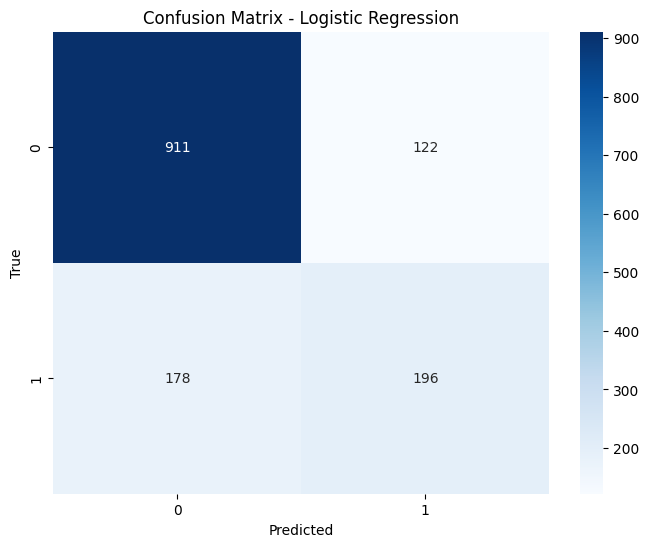

Coefficients: [[-1.30370029e-05  1.78361131e-01 -2.68473873e-02 -1.59639968e-01
  -7.54025631e-02 -2.00827740e-01  1.65316294e-01 -1.90461543e-02
  -4.24105698e-01 -1.53747724e-01 -1.02541233e-01 -4.23102087e-01
   6.08197994e-02  7.13616318e-02 -4.18797645e-01  1.64856548e-01
   3.47872433e-02  1.22073764e-02  4.79065458e-04]]


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create Logistic Regression classifier object
logistic_model = LogisticRegression()  # Increase max_iter for convergence

# Train Logistic Regression Classifier
logistic_model.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = logistic_model.predict(x_test)

# Calculate the accuracy of the model
logistic_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression testing set accuracy: {logistic_accuracy * 100:.2f}%")

# Generate classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Access coefficients of the logistic regression model
coefficients = logistic_model.coef_
print("Coefficients:", coefficients)


#Decision Tree Model

Decision Tree testing set accuracy: 71.78%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1033
           1       0.47      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.72      0.72      0.72      1407

Decision Tree Confusion Matrix:
[[821 212]
 [185 189]]


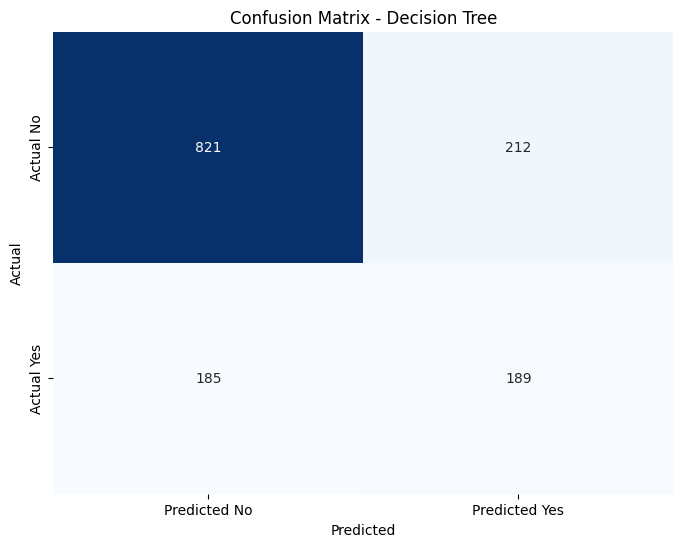

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion matrix for Decision Tree: 
[[821 212]
 [185 189]]


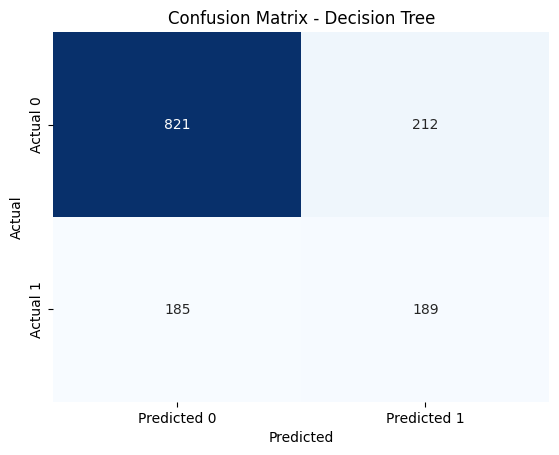

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create Decision Tree classifier object
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Train Decision Tree Classifier
dt_model.fit(x_train, y_train)

# Predict the response for test dataset
dt_pred = dt_model.predict(x_test)

# Calculate the accuracy of the model
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree testing set accuracy: {dt_accuracy * 100:.2f}%")

# Print the classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, dt_pred)
print("Decision Tree Confusion Matrix:")
print(cm)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted No", "Predicted Yes"],
            yticklabels=["Actual No", "Actual Yes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, dt_pred)
print(f"Confusion matrix for Decision Tree: \n{cm}")

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


#Random Forest Model

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create Random Forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Random Forest Classifier
rf_classifier.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = rf_classifier.predict(x_test)

# Calculate the accuracy of the model
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest testing set accuracy: {rf_accuracy * 100:.2f}%")



Random Forest testing set accuracy: 79.18%


Confusion matrix for Random Forest: 
[[936  97]
 [196 178]]


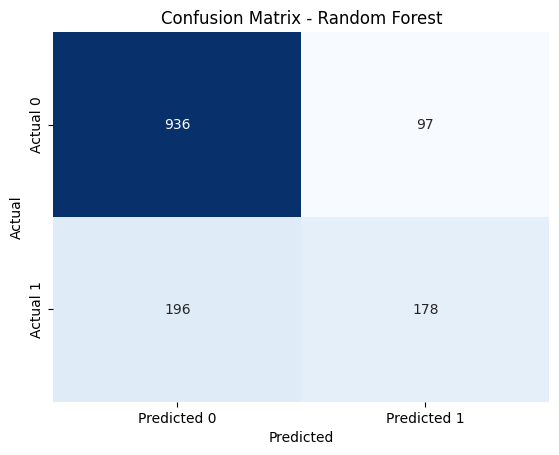

In [112]:

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix for Random Forest: \n{cm}")

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [113]:
# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



#Comparision of all Models Accuracies by Visual

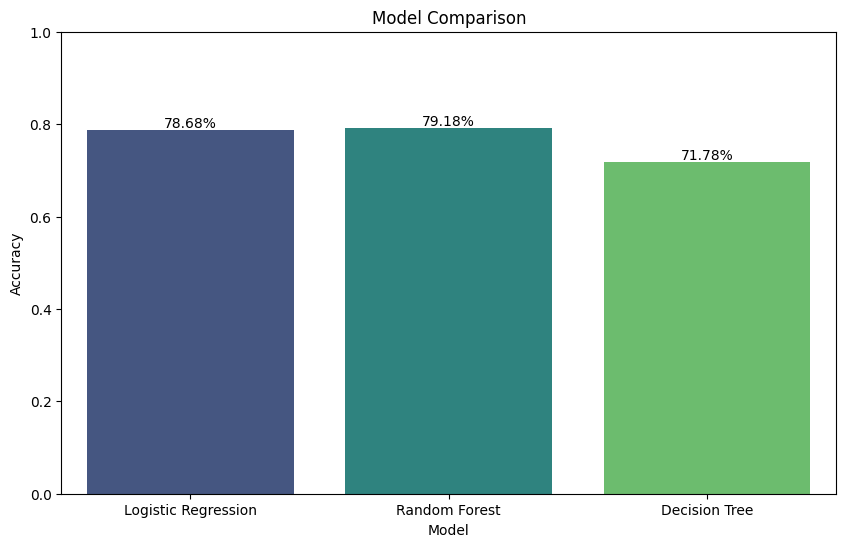

                 Model  Accuracy
0  Logistic Regression  0.786780
1        Random Forest  0.791756
2        Decision Tree  0.717839


In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# As our data has already been preprocessed

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['Churn'], axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)  # Ensure convergence with max_iter set to 1000
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Decision Tree
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Create a DataFrame for model comparison
model_comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy': [logistic_accuracy, rf_accuracy, dt_accuracy]
})

# Plotting the comparison with percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=model_comparison_df, palette='viridis')

# Display percentages on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Model Comparison')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()

print(model_comparison_df)


# From Above Bar Chart,it was shown that Random Forest Model is performing well with an Accuracy of 79.18%